# Overfitting

## Import Library

In [4]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import copy
import torch
# from PIL import Image
# import pickle
import import_ipynb
sys.path.append(os.pardir)
from DataSet.mnist import load_mnist
from Ch2_3.handWrittenDigit import get_data, init_network, predict, img_show
from Ch2_3.activation_function import softmax, sigmoid
from Ch4.load_error import cross_entropy_error
from Ch6.histogram import MultiLayerNetExtend
from Ch6.training_tech import AdaGrad, SGD

## Load Data

In [8]:
(x_train, t_train), (x_test, t_test)\
    = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

## Train

In [41]:
network = MultiLayerNetExtend(input_size=784,\
    hidden_size_list=[100,100,100,100,100,100],\
    output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000000000):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch,t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt>=max_epochs:
            break

In [44]:
print(train_acc_list.count(1))
print(len(train_acc_list))

106
201


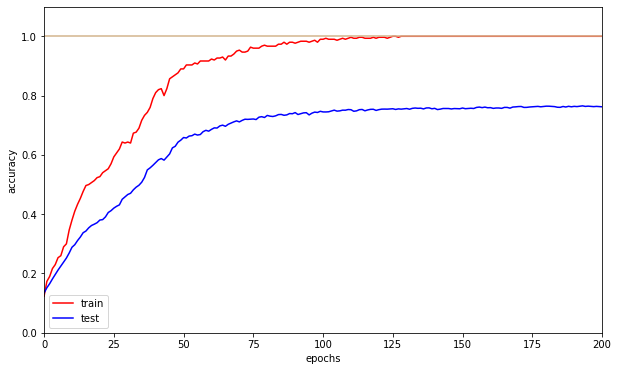

In [31]:
plt.figure(figsize=(10,6))
plt.plot(train_acc_list,'-r',label='train')
plt.plot(test_acc_list,'-b',label='test')
plt.plot([0,200],[1,1],'-',color='tan')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.ylim(0,1.1)
plt.xlim(0,200)
plt.legend()
plt.show()

In [32]:
network = MultiLayerNetExtend(input_size=784,\
    hidden_size_list=[100,100,100,100,100,100],\
    weight_decay_lambda=0.1, output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000000000):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch,t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt>=max_epochs:
            break

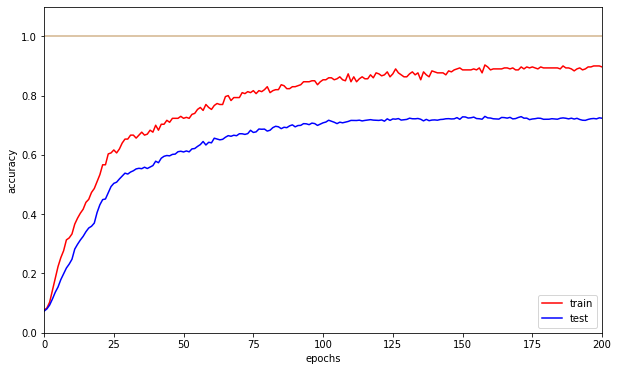

In [34]:
plt.figure(figsize=(10,6))
plt.plot(train_acc_list,'-r',label='train')
plt.plot(test_acc_list,'-b',label='test')
plt.plot([0,200],[1,1],'-',color='tan')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.ylim(0,1.1)
plt.xlim(0,200)
plt.legend()
plt.show()

## Dropout Layer

In [35]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x*self.mask
        else:
            return x*(1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout*self.mask

In [38]:
network = MultiLayerNetExtend(input_size=784,\
    hidden_size_list=[100,100,100,100,100,100],\
    use_dropout=True, dropout_ration=0.15, output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(100000000000):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch,t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt>=max_epochs:
            break

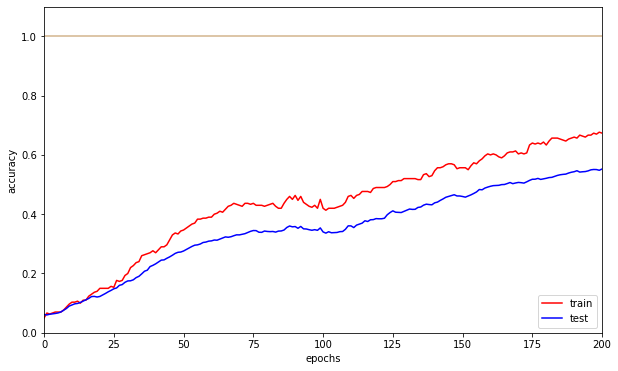

In [39]:
plt.figure(figsize=(10,6))
plt.plot(train_acc_list,'-r',label='train')
plt.plot(test_acc_list,'-b',label='test')
plt.plot([0,200],[1,1],'-',color='tan')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.ylim(0,1.1)
plt.xlim(0,200)
plt.legend()
plt.show()